In [1]:
import urllib
import gromacs as gmx
import nglview as nv
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

NOTE: Some configuration directories are not set up yet: 
	/home/jovyan/.gromacswrapper
	/home/jovyan/.gromacswrapper/qscripts
	/home/jovyan/.gromacswrapper/templates
NOTE: You can create the configuration file and directories with:
	>>> import gromacs
	>>> gromacs.config.setup()


In [2]:
mdrun=gmx.MDrunnerK8s(image='cerit.io/ljocha/gromacs:2023-2-plumed-2-9-afed-pytorch-model-cv')

def run(mpi=1,omp=2,gpus=1,**kwargs):
    mdrun.run(pre={'cores':omp*mpi,'mpi':mpi,'omp':omp,'gpus':gpus}, mdrunargs={**kwargs,'ntomp':omp},ncores=mpi)

In [3]:
pdb='6pxm'
urllib.request.urlretrieve(f'https://files.rcsb.org/download/{pdb}.pdb',f'{pdb}.pdb')

('6pxm.pdb', <http.client.HTTPMessage at 0x7fbb350a13d0>)

In [4]:
nv.show_file(f'{pdb}.pdb')

NGLWidget()

In [4]:
!pip install git+https://github.com/KrKOo/flare.git#egg=flare

  Cloning https://github.com/KrKOo/flare.git to /tmp/pip-install-0n2_smqp/flare_0964948084a4448aa684abdbb7f6de82
  Running command git clone --filter=blob:none --quiet https://github.com/KrKOo/flare.git /tmp/pip-install-0n2_smqp/flare_0964948084a4448aa684abdbb7f6de82
  Resolved https://github.com/KrKOo/flare.git to commit 7cfe8676c819c6b4b8b120b5bfe5601882bdc8c9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Created wheel for flare: filename=flare-0.1.0-py3-none-any.whl size=2814 sha256=a422752eea1b9129b21d46260efb292d83d7305b3e01e99048defdc666ef4114
  Stored in directory: /tmp/pip-ephem-wheel-cache-nofogst7/wheels/ec/79/55/c2a7f4f901f590a89395d553c12f5a9fc654e36b2643b430be
Successfully built flare
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0


In [6]:
!pip install streamlit-molstar

  Using cached streamlit_molstar-0.4.21-py3-none-any.whl
  Using cached streamlit-1.45.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
Using cached streamlit-1.45.1-py3-none-any.whl (9.9 MB)
Using cached altair-5.5.0-py3-none-any.whl (731 kB)
Using cached GitPython-3.1.44-py3-none-any.whl (207 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)


In [8]:
gmx.pdb2gmx(f=pdb+'.pdb',o=pdb+'.gro',water='tip3p',ff='amber99',p=pdb+'.top',ignh=True)
print("succesful")

            :-) GROMACS - gmx pdb2gmx, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx pdb2gmx -f 6pxm.pdb -o 6pxm.gro -water tip3p -ff amber99 -p 6pxm.top -ignh

Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/aminoacids.r2b
Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/dna.r2b
Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/rna.r2b


Using the Amber99 force field in directory amber99.ff

going to rename amber99.ff/aminoacids.r2b

going to rename amber99.ff/dna.r2b

going to rename amber99.ff/rna.r2b
Reading 6pxm.pdb...
Read 'FERRITIN LIGHT CHAIN; 4 W, X, Y', 32736 atoms

Analyzing pdb file
Splitting chemical chains based on TER records or chain id changing.

There are 24 chains and 0 blocks of water and 4080 residues with 32736 atoms

  chain  #res #atoms

  1 'B'   170   1364  

  2 'A'   170   1364  

  3 'C'   170   1364  

  4 'D'   170   1364  

  5 'E'   170   1364  

  6 'F'   170   1364  

  7 'G'   170   1364  

  8 'H'   170   1364  

  9 'I'   170   1364  

  10 'J'   170   1364  

  11 'K'   170   1364  

  12 'L'   170   1364  

  13 'M'   170   1364  

  14 'N'   170   1364  

  15 'O'   170   1364  

  16 'P'   170   1364  

  17 'Q'   170   1364  

  18 'R'   170   1364  

  19 'S'   170   1364  

  20 'T'   170   1364  

  21 'V'   170   1364  

  22 'W'   170   1364  

  23 'X'   170   1364  

  2

All occupancies are one
Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/atomtypes.atp
Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/aminoacids.rtp
Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/dna.rtp
Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/rna.rtp
Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/aminoacids.hdb
Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/dna.hdb
Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/rna.hdb
Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/aminoacids.n.tdb
Opening force field file /gromacs/AVX2_256_ts/share/gromacs/top/amber99.ff/aminoacids.c.tdb
Analysing hydrogen-bonding network for automated assignment of histidine
 protonation. 260 donors and 260 acceptors were found.
There are 282 hydrogen bonds
Will use HISE for residue 49
Will 


Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 2 'A' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...


Analysing hydrogen-bonding network for automated assignment of histidine
 protonation. 260 donors and 260 acceptors were found.
There are 282 hydrogen bonds
Will use HISE for residue 49
Will use HISE for residue 114
Will use HISE for residue 124
Will use HISE for residue 132
Will use HISE for residue 147
8 out of 8 lines of specbond.dat converted successfully
Special Atom Distance matrix:
                   CYS48   HIS49   MET68   MET96  HIS114  HIS124  CYS126
                   SG382  NE2392   SD555   SD778  NE2917  NE2984   SG998
   HIS49  NE2392   0.874
   MET68   SD555   3.235   2.960
   MET96   SD778   1.346   1.379   2.908
  HIS114  NE2917   3.477   3.127   1.212   2.679
  HIS124  NE2984   3.573   3.157   0.627   3.214   1.230
  CYS126   SG998   3.686   3.363   1.055   2.963   0.369   1.075
  HIS132 NE21050   2.909   2.413   0.925   2.555   1.240   0.789   1.313
  MET144  SD1152   1.613   1.542   2.444   0.509   2.180   2.756   2.458
  HIS147 NE21175   1.448   1.152   2.981   0.5


Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 3 'C' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology


Before cleaning: 7188 dihedrals
Analysing hydrogen-bonding network for automated assignment of histidine
 protonation. 260 donors and 260 acceptors were found.
There are 281 hydrogen bonds
Will use HISE for residue 49
Will use HISE for residue 114
Will use HISE for residue 124
Will use HISE for residue 132
Will use HISE for residue 147
8 out of 8 lines of specbond.dat converted successfully
Special Atom Distance matrix:
                   CYS48   HIS49   MET68   MET96  HIS114  HIS124  CYS126
                   SG382  NE2392   SD555   SD778  NE2917  NE2984   SG998
   HIS49  NE2392   0.874
   MET68   SD555   3.235   2.960
   MET96   SD778   1.346   1.379   2.908
  HIS114  NE2917   3.477   3.127   1.212   2.679
  HIS124  NE2984   3.573   3.157   0.627   3.214   1.230
  CYS126   SG998   3.686   3.363   1.055   2.963   0.369   1.075
  HIS132 NE21050   2.909   2.413   0.925   2.555   1.240   0.789   1.313
  MET144  SD1152   1.613   1.542   2.444   0.509   2.180   2.756   2.458
  HIS147 NE211


Processing chain 4 'D' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 5 'E' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...


Analysing hydrogen-bonding network for automated assignment of histidine
 protonation. 260 donors and 260 acceptors were found.
There are 281 hydrogen bonds
Will use HISE for residue 49
Will use HISE for residue 114
Will use HISE for residue 124
Will use HISE for residue 132
Will use HISE for residue 147
8 out of 8 lines of specbond.dat converted successfully
Special Atom Distance matrix:
                   CYS48   HIS49   MET68   MET96  HIS114  HIS124  CYS126
                   SG382  NE2392   SD555   SD778  NE2917  NE2984   SG998
   HIS49  NE2392   0.874
   MET68   SD555   3.235   2.960
   MET96   SD778   1.346   1.379   2.908
  HIS114  NE2917   3.477   3.127   1.212   2.679
  HIS124  NE2984   3.573   3.157   0.627   3.214   1.230
  CYS126   SG998   3.686   3.363   1.055   2.963   0.369   1.075
  HIS132 NE21050   2.909   2.413   0.925   2.556   1.240   0.789   1.313
  MET144  SD1152   1.613   1.542   2.444   0.509   2.180   2.756   2.458
  HIS147 NE21175   1.448   1.152   2.981   0.5


Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 6 'F' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...


Analysing hydrogen-bonding network for automated assignment of histidine
 protonation. 260 donors and 260 acceptors were found.
There are 281 hydrogen bonds
Will use HISE for residue 49
Will use HISE for residue 114
Will use HISE for residue 124
Will use HISE for residue 132
Will use HISE for residue 147
8 out of 8 lines of specbond.dat converted successfully
Special Atom Distance matrix:
                   CYS48   HIS49   MET68   MET96  HIS114  HIS124  CYS126
                   SG382  NE2392   SD555   SD778  NE2917  NE2984   SG998
   HIS49  NE2392   0.874
   MET68   SD555   3.235   2.960
   MET96   SD778   1.346   1.379   2.908
  HIS114  NE2917   3.477   3.127   1.212   2.679
  HIS124  NE2984   3.573   3.157   0.627   3.214   1.230
  CYS126   SG998   3.686   3.362   1.055   2.963   0.369   1.075
  HIS132 NE21050   2.909   2.413   0.925   2.555   1.240   0.789   1.313
  MET144  SD1152   1.613   1.542   2.444   0.509   2.180   2.756   2.458
  HIS147 NE21175   1.448   1.152   2.981   0.5


Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 7 'G' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 8 'H' (1364 atoms, 170 residues)

Identified residue SER2 as a st

Before cleaning: 7148 pairs
Before cleaning: 7188 dihedrals
Analysing hydrogen-bonding network for automated assignment of histidine
 protonation. 260 donors and 260 acceptors were found.
There are 282 hydrogen bonds
Will use HISE for residue 49
Will use HISE for residue 114
Will use HISE for residue 124
Will use HISE for residue 132
Will use HISE for residue 147
8 out of 8 lines of specbond.dat converted successfully
Special Atom Distance matrix:
                   CYS48   HIS49   MET68   MET96  HIS114  HIS124  CYS126
                   SG382  NE2392   SD555   SD778  NE2917  NE2984   SG998
   HIS49  NE2392   0.874
   MET68   SD555   3.235   2.960
   MET96   SD778   1.346   1.379   2.908
  HIS114  NE2917   3.477   3.127   1.212   2.679
  HIS124  NE2984   3.573   3.157   0.627   3.214   1.230
  CYS126   SG998   3.686   3.363   1.055   2.963   0.369   1.075
  HIS132 NE21050   2.909   2.413   0.925   2.555   1.240   0.789   1.313
  MET144  SD1152   1.613   1.542   2.443   0.509   2.180   


Processing chain 9 'I' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 10 'J' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and

Analysing hydrogen-bonding network for automated assignment of histidine
 protonation. 260 donors and 260 acceptors were found.
There are 282 hydrogen bonds
Will use HISE for residue 49
Will use HISE for residue 114
Will use HISE for residue 124
Will use HISE for residue 132
Will use HISE for residue 147
8 out of 8 lines of specbond.dat converted successfully
Special Atom Distance matrix:
                   CYS48   HIS49   MET68   MET96  HIS114  HIS124  CYS126
                   SG382  NE2392   SD555   SD778  NE2917  NE2984   SG998
   HIS49  NE2392   0.874
   MET68   SD555   3.236   2.960
   MET96   SD778   1.346   1.379   2.908
  HIS114  NE2917   3.477   3.127   1.212   2.679
  HIS124  NE2984   3.573   3.157   0.627   3.214   1.230
  CYS126   SG998   3.686   3.362   1.054   2.963   0.369   1.075
  HIS132 NE21050   2.909   2.413   0.925   2.555   1.240   0.789   1.313
  MET144  SD1152   1.613   1.542   2.444   0.509   2.180   2.756   2.458
  HIS147 NE21175   1.448   1.152   2.981   0.5


Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 13 'M' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual site

Before cleaning: 7148 pairs
Before cleaning: 7188 dihedrals
Analysing hydrogen-bonding network for automated assignment of histidine
 protonation. 260 donors and 260 acceptors were found.
There are 282 hydrogen bonds
Will use HISE for residue 49
Will use HISE for residue 114
Will use HISE for residue 124
Will use HISE for residue 132
Will use HISE for residue 147
8 out of 8 lines of specbond.dat converted successfully
Special Atom Distance matrix:
                   CYS48   HIS49   MET68   MET96  HIS114  HIS124  CYS126
                   SG382  NE2392   SD555   SD778  NE2917  NE2984   SG998
   HIS49  NE2392   0.874
   MET68   SD555   3.235   2.960
   MET96   SD778   1.346   1.379   2.908
  HIS114  NE2917   3.477   3.127   1.212   2.679
  HIS124  NE2984   3.573   3.157   0.627   3.214   1.230
  CYS126   SG998   3.686   3.362   1.055   2.963   0.369   1.075
  HIS132 NE21050   2.909   2.413   0.925   2.555   1.240   0.789   1.313
  MET144  SD1152   1.613   1.542   2.444   0.509   2.180   


Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 16 'P' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 17 'Q' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus

Analysing hydrogen-bonding network for automated assignment of histidine
 protonation. 260 donors and 260 acceptors were found.
There are 282 hydrogen bonds
Will use HISE for residue 49
Will use HISE for residue 114
Will use HISE for residue 124
Will use HISE for residue 132
Will use HISE for residue 147
8 out of 8 lines of specbond.dat converted successfully
Special Atom Distance matrix:
                   CYS48   HIS49   MET68   MET96  HIS114  HIS124  CYS126
                   SG382  NE2392   SD555   SD778  NE2917  NE2984   SG998
   HIS49  NE2392   0.874
   MET68   SD555   3.235   2.960
   MET96   SD778   1.346   1.379   2.908
  HIS114  NE2917   3.477   3.127   1.212   2.679
  HIS124  NE2984   3.573   3.157   0.627   3.214   1.230
  CYS126   SG998   3.686   3.363   1.055   2.963   0.369   1.075
  HIS132 NE21050   2.909   2.413   0.925   2.555   1.240   0.789   1.313
  MET144  SD1152   1.613   1.542   2.444   0.509   2.180   2.756   2.458
  HIS147 NE21175   1.448   1.152   2.981   0.5


Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 19 'S' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 20 'T' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atom

Will use HISE for residue 49
Will use HISE for residue 114
Will use HISE for residue 124
Will use HISE for residue 132
Will use HISE for residue 147
8 out of 8 lines of specbond.dat converted successfully
Special Atom Distance matrix:
                   CYS48   HIS49   MET68   MET96  HIS114  HIS124  CYS126
                   SG382  NE2392   SD555   SD778  NE2917  NE2984   SG998
   HIS49  NE2392   0.874
   MET68   SD555   3.235   2.960
   MET96   SD778   1.346   1.379   2.908
  HIS114  NE2917   3.477   3.127   1.212   2.679
  HIS124  NE2984   3.573   3.157   0.627   3.214   1.230
  CYS126   SG998   3.686   3.362   1.055   2.963   0.369   1.075
  HIS132 NE21050   2.909   2.413   0.925   2.556   1.240   0.789   1.313
  MET144  SD1152   1.613   1.542   2.444   0.509   2.180   2.756   2.458
  HIS147 NE21175   1.448   1.152   2.981   0.563   2.711   3.187   3.020
                  HIS132  MET144
                 NE21050  SD1152
  MET144  SD1152   2.138
  HIS147 NE21175   2.460   0.804
Openin


Processing chain 22 'W' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals and pairs...

Making cmap torsions...

There are 7188 dihedrals,  554 impropers, 4927 angles
          7103 pairs,     2735 bonds and     0 virtual sites

Total mass 19372.074 a.m.u.

Total charge -7.000 e

Writing topology

Processing chain 23 'X' (1364 atoms, 170 residues)

Identified residue SER2 as a starting terminus.

Identified residue LEU171 as a ending terminus.

Checking for duplicate atoms....

Generating any missing hydrogen atoms and/or adding termini.

Now there are 170 residues with 2713 atoms
Chain time...

Making bonds...

Number of bonds was 2736, now 2735

Generating angles, dihedrals an

Before cleaning: 7148 pairs
Before cleaning: 7188 dihedrals

GROMACS reminds you: "Everybody Lie Down On the Floor and Keep Calm" (KLF)



In [9]:
gmx.editconf(f=pdb+'.gro',o=pdb+'-box.gro',c=True,d='1.5', bt='dodecahedron')

            :-) GROMACS - gmx editconf, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx editconf -f 6pxm.gro -o 6pxm-box.gro -c -d 1.5 -bt dodecahedron



Note that major changes are planned in future for editconf, to improve usability and utility.
Read 65112 atoms
Volume: 0.001 nm^3, corresponds to roughly 0 electrons
No velocities found
    system size : 12.227 12.226 12.222 (nm)
    diameter    : 13.403               (nm)
    center      : 13.313 13.312 13.312 (nm)
    box vectors :  0.100  0.100  0.100 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  :   0.00               (nm^3)
    shift       : -1.011 -1.010 -7.513 (nm)
new center      : 12.302 12.302  5.799 (nm)
new box vectors : 16.403 16.403 16.403 (nm)
new box angles  :  60.00  60.00  90.00 (degrees)
new box volume  :3120.53               (nm^3)



GROMACS reminds you: "AH ....Satisfaction" (IRIX imapd)



(0, None, None)

In [10]:
gmx.solvate(cp=pdb+'-box.gro',cs='spc216.gro',o=pdb+'-solv.gro',p=pdb+'.top')

            :-) GROMACS - gmx solvate, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx solvate -cp 6pxm-box.gro -cs spc216.gro -o 6pxm-solv.gro -p 6pxm.top

Reading solute configuration
Reading solvent configuration

Initialising inter-atomic distances...
Generating solvent configuration
Will generate new solvent configuration of 9x9x7 boxes
Solvent box contains 333396 atoms in 111132 residues



         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

NOTE: From version 5.0 gmx solvate uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS versions.

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
A. Bondi
van der Waals Volumes and Radii
J. Phys. Chem. 68 (1964) pp. 441-451
-------- -------- --- Thank You --- -------- --------



Removed 26736 solvent atoms due to solvent-solvent overlap
Removed 59430 solvent atoms due to solute-solvent overlap
Sorting configuration
Found 1 molecule type:
    SOL (   3 atoms): 82410 residues
Generated solvent containing 247230 atoms in 82410 residues
Writing generated configuration to 6pxm-solv.gro

Output configuration contains 312342 atoms in 86490 residues


Adding line for 82410 solvent molecules with resname (SOL) to topology file (6pxm.top)


Volume                 :     3120.53 (nm^3)
Density                :     1054.58 (g/l)
Number of solvent molecules:  82410   

Processing topology

Back Off! I just backed up 6pxm.top to ./#6pxm.top.1#

GROMACS reminds you: "Keep Your Shoes and Socks On, People" (F. Zappa)



(0, None, None)

In [11]:
with open('ions.mdp','w') as ions:
    ions.write("""\
; ions.mdp - used as input into grompp to generate ions.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep         ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01          ; Minimization step size
nsteps      = 50000         ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 1         ; Frequency to update the neighbor list and long range forces
cutoff-scheme	= Verlet    ; Buffered neighbor searching 
ns_type         = grid      ; Method to determine neighbor list (simple, grid)
coulombtype     = cutoff    ; Treatment of long range electrostatic interactions
rcoulomb        = 1.0       ; Short-range electrostatic cut-off
rvdw            = 1.0       ; Short-range Van der Waals cut-off
pbc             = xyz       ; Periodic Boundary Conditions in all 3 dimensions
""")
    
gmx.grompp(f='ions.mdp',c=pdb+'-solv.gro',p=pdb+'.top',o='ions.tpr')

             :-) GROMACS - gmx grompp, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx grompp -f ions.mdp -c 6pxm-solv.gro -p 6pxm.top -o ions.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ions.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Generating 1-4 interactions: fudge = 0.5


Setting the LD random seed to -71049

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_B'

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 3 bonded neighbours molecule type 'Protein_chain_C'

Excluding 3 bonded neighbours molecule type 'Protein_chain_D'

Excluding 3 bonded neighbours molecule type 'Protein_chain_E'

Excluding 3 bonded neighbours molecule type 'Protein_chain_F'

Excluding 3 bonded neighbours molecule type 'Protein_chain_G'

Excluding 3 bonded neighbours molecule type 'Protein_chain_H'

Excluding 3 bonded neighbours molecule type 'Protein_chain_I'

Excluding 3 bonded neighbours molecule type 'Protein_chain_J'

Excluding 3 bonded neighbours molecule type 'Protein_chain_K'

Excluding 3 bonded neighbours molecule type 'Protein_chain_L'

Excluding 3 bonded neighbours molecule type 'Protein_chain_M'

Excluding 3 bonded neighbo


NOTE 2 [file 6pxm.top, line 92]:
  System has non-zero total charge: -168.000000
  Total charge should normally be an integer. See
  http://www.gromacs.org/Documentation/Floating_Point_Arithmetic
  for discussion on how close it should be to an integer.





Analysing residue names:
There are:  4080    Protein residues
There are: 82410      Water residues
Analysing Protein...

This run will generate roughly 24 Mb of data


Number of degrees of freedom in T-Coupling group rest is 689793.00
The integrator does not provide a ensemble temperature, there is no system ensemble temperature

NOTE 3 [file ions.mdp]:
  You are using a plain Coulomb cut-off, which might produce artifacts.
  You might want to consider using PME electrostatics.



There were 3 NOTEs

GROMACS reminds you: "It doesn't pay to make predictions" (Crowded House)



(0, None, None)

In [12]:
gmx.select(s=pdb+'-solv.gro',on='solv.ndx',select='SOL')

             :-) GROMACS - gmx select, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx select -s 6pxm-solv.gro -on solv.ndx -select SOL




         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.



Analyzed topology coordinates

GROMACS reminds you: "They call me 007: 0 pull requests reviewed, 0 features completed, 7 bugs created." (Anonymous)



(0, None, None)

In [13]:
gmx.genion(s='ions.tpr',n='solv.ndx',o=pdb+'-ions.gro',p=pdb+'.top',pname='NA',nname='CL',neutral=True)

             :-) GROMACS - gmx genion, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx genion -s ions.tpr -n solv.ndx -o 6pxm-ions.gro -p 6pxm.top -pname NA -nname CL -neutral

Reading file ions.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)
Reading file ions.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)
Group     0 (            SOL) has 247230 elements
There is one group in the index
Number of (3-atomic) solvent molecules: 82410

Back Off! I just backed up 6pxm.top to ./#6pxm.top.2#
Using random seed -1090519180.
Replacing solvent molecule 49319 (atom 213069) with NA
Replacing solvent molecule 16042 (atom 113238) with NA
Replacing solvent molecule 43373 (atom 195231) with NA
Replacing solvent molecule 45982 (atom 203058) with NA
Replacing solvent molecule 36746 (atom 175350) with NA
Replacing solvent molecule 63348 (atom 255156) with NA
Replacing solvent mole

Will try to add 168 NA ions and 0 CL ions.
Select a continuous group of solvent molecules

Processing topology
Replacing 168 solute molecules in topology file (6pxm.top)  by 168 NA and 0 CL ions.


Replacing solvent molecule 3700 (atom 76212) with NA
Replacing solvent molecule 10097 (atom 95403) with NA
Replacing solvent molecule 66341 (atom 264135) with NA
Replacing solvent molecule 61147 (atom 248553) with NA
Replacing solvent molecule 41455 (atom 189477) with NA
Replacing solvent molecule 63121 (atom 254475) with NA
Replacing solvent molecule 30448 (atom 156456) with NA
Replacing solvent molecule 10147 (atom 95553) with NA
Replacing solvent molecule 58675 (atom 241137) with NA
Replacing solvent molecule 25781 (atom 142455) with NA
Replacing solvent molecule 73682 (atom 286158) with NA
Replacing solvent molecule 12757 (atom 103383) with NA
Replacing solvent molecule 13966 (atom 107010) with NA
Replacing solvent molecule 69705 (atom 274227) with NA
Replacing solvent molecule 55101 (atom 230415) with NA
Replacing solvent molecule 14602 (atom 108918) with NA
Replacing solvent molecule 14479 (atom 108549) with NA
Replacing solvent molecule 12559 (atom 102789) with NA
Replacing solv

(0, None, None)

In [14]:
with open('minim.mdp','w') as m:
    m.write("""\
; minim.mdp - used as input into grompp to generate em.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep         ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.005          ; Minimization step size
nsteps      = 50000         ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 1         ; Frequency to update the neighbor list and long range forces
cutoff-scheme   = Verlet    ; Buffered neighbor searching
ns_type         = grid      ; Method to determine neighbor list (simple, grid)
coulombtype     = PME       ; Treatment of long range electrostatic interactions
rcoulomb        = 1.0       ; Short-range electrostatic cut-off
rvdw            = 1.0       ; Short-range Van der Waals cut-off
pbc             = xyz       ; Periodic Boundary Conditions in all 3 dimensions

nstxout                 = 50         
nstvout                 = 0        
nstfout                 = 0
nstenergy               = 50         
""")
    
gmx.grompp(f='minim.mdp',c=pdb+'-ions.gro',p=pdb+'.top',o='em.tpr')

             :-) GROMACS - gmx grompp, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx grompp -f minim.mdp -c 6pxm-ions.gro -p 6pxm.top -o em.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file minim.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Generating 1-4 interactions: fudge = 0.5


Setting the LD random seed to -8389701

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_B'

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 3 bonded neighbours molecule type 'Protein_chain_C'

Excluding 3 bonded neighbours molecule type 'Protein_chain_D'

Excluding 3 bonded neighbours molecule type 'Protein_chain_E'

Excluding 3 bonded neighbours molecule type 'Protein_chain_F'

Excluding 3 bonded neighbours molecule type 'Protein_chain_G'

Excluding 3 bonded neighbours molecule type 'Protein_chain_H'

Excluding 3 bonded neighbours molecule type 'Protein_chain_I'

Excluding 3 bonded neighbours molecule type 'Protein_chain_J'

Excluding 3 bonded neighbours molecule type 'Protein_chain_K'

Excluding 3 bonded neighbours molecule type 'Protein_chain_L'

Excluding 3 bonded neighbours molecule type 'Protein_chain_M'

Excluding 3 bonded neigh

Number of degrees of freedom in T-Coupling group rest is 689289.00
The integrator does not provide a ensemble temperature, there is no system ensemble temperature

NOTE 2 [file minim.mdp]:
  This run will generate roughly 3599 Mb of data


There were 2 NOTEs

GROMACS reminds you: "The Feeling of Power was Intoxicating, Magic" (Frida Hyvonen)



(0, None, None)

In [15]:
run(mpi=1,omp=2,deffnm='em',gpus=0)

job.batch/gmx-a8ddc192-eacd-426d-ad83-9fb81098fada created
pod/gmx-a8ddc192-eacd-426d-ad83-9fb81098fada-d57fx condition met


Unable to use a TTY - input is not a terminal or the right kind of file
             :-) GROMACS - gmx mdrun, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /mnt
Command line:
  gmx mdrun -deffnm em -ntomp 2

Reading file em.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)
Using 1 MPI process

Non-default thread affinity set, disabling internal thread affinity

Using 2 OpenMP threads 


Steepest Descents:
   Tolerance (Fmax)   =  1.00000e+03
   Number of steps    =        50000

writing lowest energy coordinates.

Steepest Descents converged to Fmax < 1000 in 3236 steps
Potential Energy  = -4.7804905e+06
Maximum force     =  8.2125574e+02 on atom 63361
Norm of force     =  8.0203631e+00

GROMACS reminds you: "I think it's very important to get more women into computing. My slogan is: Computing is too important to be left to men." (Karen Jones)

[WARNING] yaksa: 1 leaked handle pool objects


job.batch "gmx-a8ddc192-eacd-426d-ad83-9fb81098fada" deleted


In [16]:
gmx.select(s=pdb+'-ions.gro',on='protein.ndx',select='Protein')

             :-) GROMACS - gmx select, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx select -s 6pxm-ions.gro -on protein.ndx -select Protein




         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.



Analyzed topology coordinates

GROMACS reminds you: "User-friendly, adj.: Programmer-hostile." (New Hacker's Dictionary)



(0, None, None)

In [17]:
gmx.trjconv(s=pdb+'-ions.gro',f='em.trr',n='protein.ndx',o='em-protein.xtc')

            :-) GROMACS - gmx trjconv, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx trjconv -s 6pxm-ions.gro -f em.trr -n protein.ndx -o em-protein.xtc

Will write xtc: Compressed trajectory (portable xdr format): xtc


Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for output


Group     0 (        Protein) has 65112 elements
There is one group in the index
trr version: GMX_trn_file (single precision)
Reading frame       0 time   59.000   
Setting output precision to 0.001 (nm)
Reading frame      50 time 3218.000    ->  frame     49 time 3155.000       ->  frame     19 time 1260.000      

Last written: frame     51 time 3236.000


GROMACS reminds you: "Throughout my academic career, I'd given some pretty good talks. But being considered the best speaker in the computer science department is like being known as the tallest of the Seven Dwarfs." (Randy Pausch)



(0, None, None)

In [18]:
tr=md.load('em-protein.xtc',top=pdb+'.gro')
nv.show_mdtraj(tr)

NGLWidget(max_frame=51)

In [19]:
import subprocess

In [20]:
def compute_radius_of_gyration(tpr_file, xtc_file, output_file="gyrate.xvg"):
    """
    Compute the Radius of Gyration (Rg) using GROMACS.

    Parameters:
    - tpr_file: Path to topology file (e.g., topol.tpr).
    - xtc_file: Path to trajectory file (e.g., traj.xtc).
    - output_file: Output file name (default: gyrate.xvg).
    """
    subprocess.run([
        "gmx", "gyrate", "-s", tpr_file, "-f", xtc_file, "-o", output_file
    ], input="1\n", text=True)  # Assuming group 1 is the protein

In [21]:
def compute_sasa(tpr_file, xtc_file, output_file="sasa.xvg", residue_output="res_sasa.xvg"):
    """
    Compute SASA using GROMACS.

    Parameters:
    - tpr_file: Path to topology file (e.g., topol.tpr).
    - xtc_file: Path to trajectory file (e.g., traj.xtc).
    - output_file: Output file name for total SASA (default: sasa.xvg).
    - residue_output: Output file name for per-residue SASA (default: res_sasa.xvg).
    """
    subprocess.run([
        "gmx", "sasa", "-s", tpr_file, "-f", xtc_file, "-o", output_file,
        "-or", residue_output, "-surface", "Protein"
    ], input="1\n", text=True)

In [22]:
# computation of the RMSd agains the first frame
!echo "1 1" | gmx trjconv -s em.tpr -f em-protein.xtc -o fitted.xtc -fit rot+trans
!echo "1 1" | gmx rms -s em.tpr -f fitted.xtc -o rmsd_first.xvg -fit rot+trans

grep: write error: Broken pipe
cat: write error: Broken pipe
            :-) GROMACS - gmx trjconv, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx trjconv -s em.tpr -f em-protein.xtc -o fitted.xtc -fit rot+trans

Note that major changes are planned in future for trjconv, to improve usability and utility.
Will write xtc: Compressed trajectory (portable xdr format): xtc
Reading file em.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)
Reading file em.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)
Select group for least squares fit
Group     0 (         System) has 312006 elements
Group     1 (        Protein) has 65112 elements
Group     2 (      Protein-H) has 32760 elements
Group     3 (        C-alpha) has  4080 elements
Group     4 (       Backbone) has 12240 elements
Group     5 (      MainChain) has 16344 elements
Group     6 (   MainChain+Cb) has 20160 eleme

In [23]:
compute_radius_of_gyration("em.tpr", "em-protein.xtc")

             :-) GROMACS - gmx gyrate, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx gyrate -s em.tpr -f em-protein.xtc -o gyrate.xvg

Reading file em.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)
Reading file em.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)
Group     0 (         System) has 312006 elements
Group     1 (        Protein) has 65112 elements
Group     2 (      Protein-H) has 32760 elements
Group     3 (        C-alpha) has  4080 elements
Group     4 (       Backbone) has 12240 elements
Group     5 (      MainChain) has 16344 elements
Group     6 (   MainChain+Cb) has 20160 elements
Group     7 (    MainChain+H) has 20424 elements
Group     8 (      SideChain) has 44688 elements
Group     9 (    SideChain-H) has 16416 elements
Group    10 (    Prot-Masses) has 65112 elements
Group    11 (    non-Protein) has 246894 elements
Group    12 (       

Selected 1: 'Protein'


Reading frame      50 time 3218.000   

GROMACS reminds you: "One Cross Each" (Monty Python)



In [24]:
compute_sasa("em.tpr", "em-protein.xtc")

              :-) GROMACS - gmx sasa, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx sasa -s em.tpr -f em-protein.xtc -o sasa.xvg -or res_sasa.xvg -surface Protein

Reading file em.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)
Reading file em.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
Frank Eisenhaber and Philip Lijnzaad and Patrick Argos and Chris Sander and
Michael Scharf
The Double Cube Lattice Method: Efficient Approaches to Numerical Integration
of Surface Area and Volume and to Dot Surface Contouring of Molecular
Assemblies
J. Comp. Chem. 16 (1995) pp. 273-284
-------- -------- --- Thank You --- -------- --------

Reading frame       0 time   59.000   


         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

NOTE: From version 5.0 gmx sasa uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS versions.

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
A. Bondi
van der Waals Volumes and Radii
J. Phys. Chem. 68 (1964) pp. 441-451
-------- -------- --- Thank You --- -------- --------



Reading frame      50 time 3218.000   
Analyzed 52 frames, last time 3236.000

GROMACS reminds you: "I am at two with nature." (Woody Allen)



In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_xvg(file, title="Plot", xlabel="Time (ps)", ylabel="Value"):
    """
    Plot a GROMACS .xvg file using Matplotlib.

    Parameters:
    - file: Path to .xvg file.
    - title: Title of the plot.
    - xlabel: Label for X-axis.
    - ylabel: Label for Y-axis.
    """
    data = np.loadtxt(file, comments=["@", "#"])
    plt.plot(data[:,0], data[:,1], label=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

In [26]:
with open('nvt.mdp','w') as nvt:
    nvt.write('''title                   = OPLS Lysozyme NVT equilibration 
define                  = -DPOSRES  ; position restrain the protein
; Run parameters
integrator              = md        ; leap-frog integrator
nsteps                  = 50000     ; 2 * 50000 = 100 ps
dt                      = 0.002     ; 2 fs
; Output control
nstxout                 = 500       ; save coordinates every 1.0 ps
nstvout                 = 500       ; save velocities every 1.0 ps
nstenergy               = 500       ; save energies every 1.0 ps
nstlog                  = 500       ; update log file every 1.0 ps
; Bond parameters
continuation            = no        ; first dynamics run
constraint_algorithm    = lincs     ; holonomic constraints 
constraints             = h-bonds   ; bonds involving H are constrained
lincs_iter              = 1         ; accuracy of LINCS
lincs_order             = 4         ; also related to accuracy
; Nonbonded settings 
cutoff-scheme           = Verlet    ; Buffered neighbor searching
ns_type                 = grid      ; search neighboring grid cells
nstlist                 = 10        ; 20 fs, largely irrelevant with Verlet
rcoulomb                = 1.0       ; short-range electrostatic cutoff (in nm)
rvdw                    = 1.0       ; short-range van der Waals cutoff (in nm)
DispCorr                = EnerPres  ; account for cut-off vdW scheme
; Electrostatics
coulombtype             = PME       ; Particle Mesh Ewald for long-range electrostatics
pme_order               = 4         ; cubic interpolation
fourierspacing          = 0.16      ; grid spacing for FFT
; Temperature coupling is on
tcoupl                  = V-rescale             ; modified Berendsen thermostat
tc-grps                 = Protein Non-Protein   ; two coupling groups - more accurate
tau_t                   = 0.1     0.1           ; time constant, in ps
ref_t                   = 300     300           ; reference temperature, one for each group, in K
; Pressure coupling is off
pcoupl                  = no        ; no pressure coupling in NVT
; Periodic boundary conditions
pbc                     = xyz       ; 3-D PBC
; Velocity generation
gen_vel                 = yes       ; assign velocities from Maxwell distribution
gen_temp                = 300       ; temperature for Maxwell distribution
gen_seed                = -1        ; generate a random seed
''')

In [27]:
gmx.grompp(f="nvt.mdp",c="em.gro",r="em.gro",p=pdb+'.top',o="nvt.tpr")

             :-) GROMACS - gmx grompp, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx grompp -f nvt.mdp -c em.gro -r em.gro -p 6pxm.top -o nvt.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Generating 1-4 interactions: fudge = 0.5


Setting the LD random seed to 769507247

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_B'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_C'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_D'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_E'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_F'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_G'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_H'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule typ

Number of degrees of freedom in T-Coupling group Protein is 162983.25
Number of degrees of freedom in T-Coupling group non-Protein is 493953.75

NOTE 1 [file nvt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There was 1 NOTE

GROMACS reminds you: "Like other defaulters, I like to lay half the blame on ill-fortune and adverse circumstances" (Mr. Rochester in Jane Eyre by Charlotte Bronte)



(0, None, None)

In [28]:
run(mpi=4,omp=2,deffnm='nvt')

job.batch/gmx-a8ddc192-eacd-426d-ad83-9fb81098fada created
pod/gmx-a8ddc192-eacd-426d-ad83-9fb81098fada-hjxh4 condition met


Unable to use a TTY - input is not a terminal or the right kind of file
             :-) GROMACS - gmx mdrun, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /mnt
Command line:
  gmx mdrun -deffnm nvt -ntomp 2

Reading file nvt.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)
Changing nstlist from 10 to 100, rlist from 1 to 1.148

On host gmx-a8ddc192-eacd-426d-ad83-9fb81098fada-hjxh4 1 GPU selected for this run.
Mapping of GPU IDs to the 4 GPU tasks in the 4 ranks on this node:
  PP:0,PP:0,PP:0,PP:0
PP tasks will do (non-perturbed) short-ranged and most bonded interactions on the GPU
PP task will update and constrain coordinates on the GPU
Using 4 MPI processes

Non-default thread affinity set, disabling internal thread affinity

Using 2 OpenMP threads per MPI process


NOTE: DLB will not turn on during the first phase of PME tuning
starting mdrun 'FERRITIN LIGHT CHAIN'
50000 steps,    100.0 ps.

NOTE: D

job.batch "gmx-a8ddc192-eacd-426d-ad83-9fb81098fada" deleted


In [29]:
gmx.energy(f='nvt.edr',o='press.xvg',input='Pressure')
#gmx.energy(f='nvt.edr',o='dens.xvg',input='Density')
gmx.energy(f='nvt.edr',o='temp.xvg',input='Temperature')

             :-) GROMACS - gmx energy, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx energy -f nvt.edr -o press.xvg

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Constr.-rmsd    20  Vir-XX        
 21  Vir-XY          22  Vir-XZ          23  Vir-YX          24  Vir-YY        
 25  Vir


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                   -267.715        8.9    266.499    55.9336  (bar)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 299.788       0.22     3.2205     1.2503  (K)


             :-) GROMACS - gmx energy, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx energy -f nvt.edr -o temp.xvg

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Constr.-rmsd    20  Vir-XX        
 21  Vir-XY          22  Vir-XZ          23  Vir-YX          24  Vir-YY        
 25  Vir-

(0, None, None)

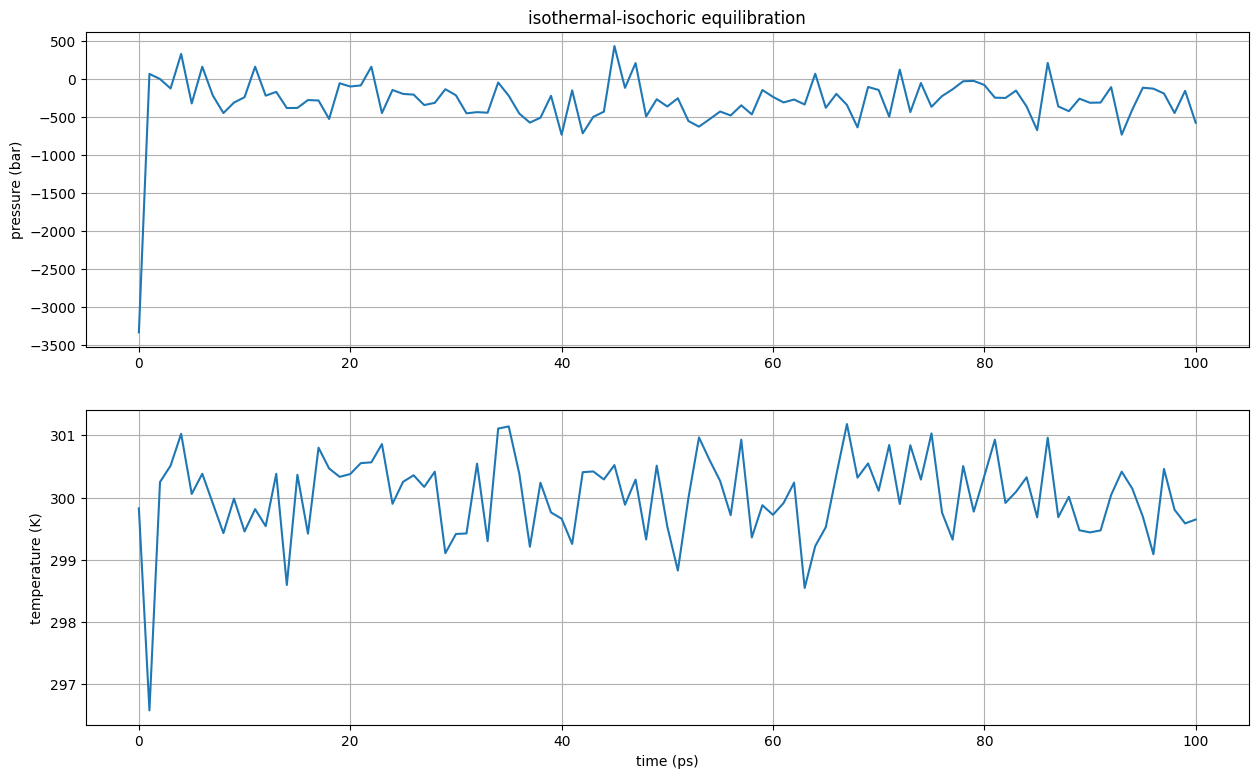

In [30]:
temp = np.loadtxt('temp.xvg',comments=['#','@'])
press = np.loadtxt('press.xvg',comments=['#','@'])

plt.figure(figsize=(15,9))
plt.subplot(211)
plt.plot(press[:,0],press[:,1])
plt.title('isothermal-isochoric equilibration')
plt.grid()
#plt.xlabel('time (ps)')
plt.ylabel("pressure (bar)")


plt.subplot(212)
plt.xlabel('time (ps)')
plt.ylabel('temperature (K)')
plt.grid()
plt.plot(temp[:,0],temp[:,1])

plt.show()

In [31]:
with open('npt.mdp','w') as npt:
    npt.write('''define                  = -DPOSRES  ; position restrain the protein
; Run parameters
integrator              = md        ; leap-frog integrator
nsteps                  = 50000     ; 2 * 50000 = 100 ps
dt                      = 0.002     ; 2 fs
; Output control
nstxout                 = 500       ; save coordinates every 1.0 ps
nstvout                 = 500       ; save velocities every 1.0 ps
nstenergy               = 500       ; save energies every 1.0 ps
nstlog                  = 500       ; update log file every 1.0 ps
; Bond parameters
continuation            = yes       ; Restarting after NVT 
constraint_algorithm    = lincs     ; holonomic constraints 
constraints             = h-bonds   ; bonds involving H are constrained
lincs_iter              = 1         ; accuracy of LINCS
lincs_order             = 4         ; also related to accuracy
; Nonbonded settings 
cutoff-scheme           = Verlet    ; Buffered neighbor searching
ns_type                 = grid      ; search neighboring grid cells
nstlist                 = 10        ; 20 fs, largely irrelevant with Verlet scheme
rcoulomb                = 1.0       ; short-range electrostatic cutoff (in nm)
rvdw                    = 1.0       ; short-range van der Waals cutoff (in nm)
DispCorr                = EnerPres  ; account for cut-off vdW scheme
; Electrostatics
coulombtype             = PME       ; Particle Mesh Ewald for long-range electrostatics
pme_order               = 4         ; cubic interpolation
fourierspacing          = 0.16      ; grid spacing for FFT
; Temperature coupling is on
tcoupl                  = V-rescale             ; modified Berendsen thermostat
tc-grps                 = Protein Non-Protein   ; two coupling groups - more accurate
tau_t                   = 0.1     0.1           ; time constant, in ps
ref_t                   = 300     300           ; reference temperature, one for each group, in K
; Pressure coupling is on
; ljocha pcoupl                  = Parrinello-Rahman     ; Pressure coupling on in NPT
pcoupl = C-rescale
pcoupltype              = isotropic             ; uniform scaling of box vectors
; ljocha tau_p                   = 2.0                   ; time constant, in ps
tau_p = 5.0
ref_p                   = 1.0                   ; reference pressure, in bar
compressibility         = 4.5e-5                ; isothermal compressibility of water, bar^-1
refcoord_scaling        = com
; Periodic boundary conditions
pbc                     = xyz       ; 3-D PBC
; Velocity generation
gen_vel                 = no        ; Velocity generation is off 
''')

In [32]:
gmx.grompp(f="npt.mdp",c="nvt.gro",r="nvt.gro",p=pdb+'.top',o="npt.tpr")

             :-) GROMACS - gmx grompp, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -p 6pxm.top -o npt.tpr

Ignoring obsolete mdp entry 'ns_type'
Generating 1-4 interactions: fudge = 0.5


Setting the LD random seed to -201863966

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_B'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_C'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_D'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_E'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_F'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_G'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_H'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule ty

Number of degrees of freedom in T-Coupling group Protein is 162983.25
Number of degrees of freedom in T-Coupling group non-Protein is 493953.75

NOTE 1 [file npt.mdp]:
  Removing center of mass motion in the presence of position restraints
  might cause artifacts. When you are using position restraints to
  equilibrate a macro-molecule, the artifacts are usually negligible.


There was 1 NOTE



The largest distance between excluded atoms is 0.433 nm between atom 15841 and 15849

Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K

Calculated rlist for 1x1 atom pair-list as 1.032 nm, buffer size 0.032 nm

Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm

Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 104x104x104, spacing 0.158 0.158 0.158

Estimate for the relative computational load of the PME mesh part: 0.22

This run will generate roughly 745 Mb of data



GROMACS reminds you: "I can't relate to you" (Bad Religion)



(0, None, None)

In [33]:
run(mpi=4,omp=2,deffnm='npt')

job.batch/gmx-a8ddc192-eacd-426d-ad83-9fb81098fada created
pod/gmx-a8ddc192-eacd-426d-ad83-9fb81098fada-gsswz condition met
pod/gmx-a8ddc192-eacd-426d-ad83-9fb81098fada-hjxh4 condition met


Unable to use a TTY - input is not a terminal or the right kind of file
             :-) GROMACS - gmx mdrun, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /mnt
Command line:
  gmx mdrun -deffnm npt -ntomp 2

Reading file npt.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)
Changing nstlist from 10 to 100, rlist from 1 to 1.147

On host gmx-a8ddc192-eacd-426d-ad83-9fb81098fada-gsswz 1 GPU selected for this run.
Mapping of GPU IDs to the 4 GPU tasks in the 4 ranks on this node:
  PP:0,PP:0,PP:0,PP:0
PP tasks will do (non-perturbed) short-ranged and most bonded interactions on the GPU
PP task will update and constrain coordinates on the GPU
Using 4 MPI processes

Non-default thread affinity set, disabling internal thread affinity

Using 2 OpenMP threads per MPI process


NOTE: DLB will not turn on during the first phase of PME tuning
starting mdrun 'FERRITIN LIGHT CHAIN'
50000 steps,    100.0 ps.

NOTE: D

job.batch "gmx-a8ddc192-eacd-426d-ad83-9fb81098fada" deleted


In [34]:
gmx.energy(f='npt.edr',o='press.xvg',input='Pressure')
gmx.energy(f='npt.edr',o='dens.xvg',input='Density')
gmx.energy(f='npt.edr',o='temp.xvg',input='Temperature')

             :-) GROMACS - gmx energy, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx energy -f npt.edr -o press.xvg

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Constr.-rmsd    20  Box-X         
 21  Box-Y           22  Box-Z           23  Volume          24  Density       
 25  pV 


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                   -5.81967        7.3    215.198    25.9001  (bar)


             :-) GROMACS - gmx energy, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx energy -f npt.edr -o dens.xvg

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Constr.-rmsd    20  Box-X         
 21  Box-Y           22  Box-Z           23  Volume          24  Density       
 25  pV  


Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Density                     1041.26       0.13   0.801839    0.74822  (kg/m^3)

Statistics over 50001 steps [ 0.0000 through 100.0000 ps ], 1 data sets
All statistics are over 501 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 300.027      0.014   0.563643  0.0547327  (K)


             :-) GROMACS - gmx energy, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx energy -f npt.edr -o temp.xvg

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Constr.-rmsd    20  Box-X         
 21  Box-Y           22  Box-Z           23  Volume          24  Density       
 25  pV  

(0, None, None)

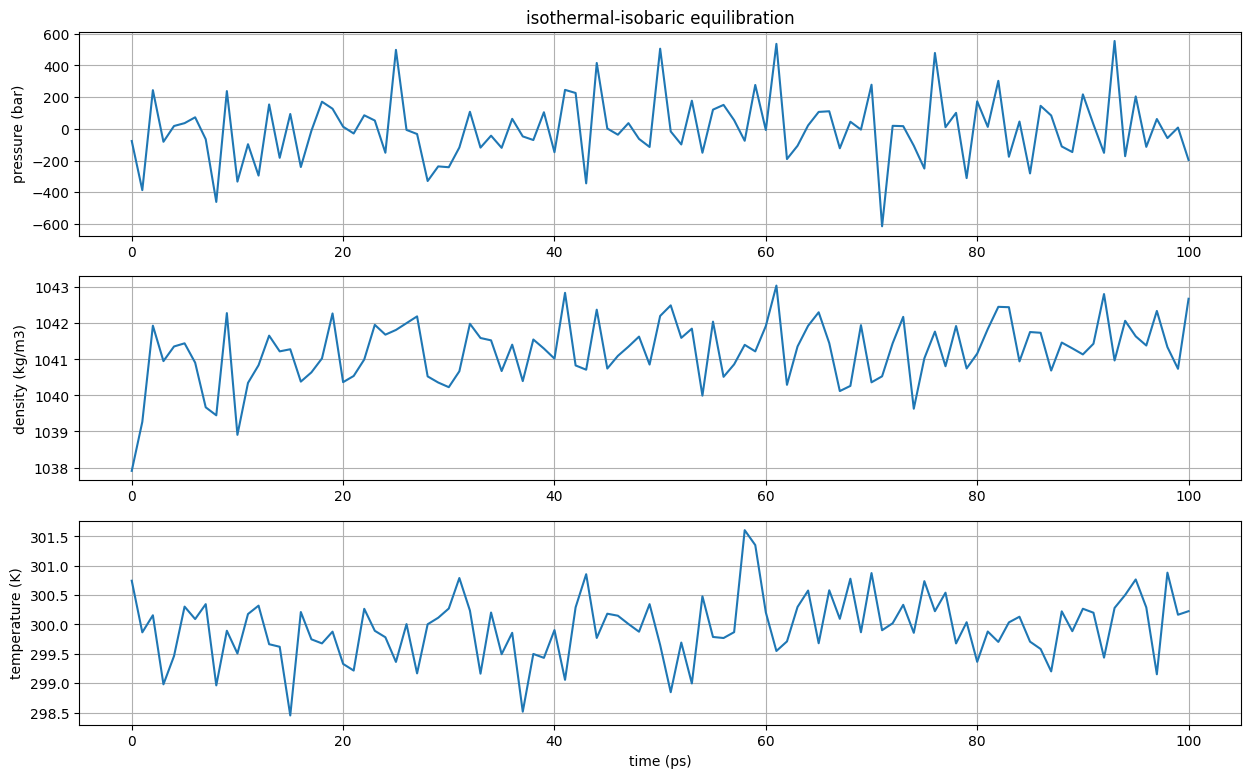

In [35]:
temp = np.loadtxt('temp.xvg',comments=['#','@'])
press = np.loadtxt('press.xvg',comments=['#','@'])
dens = np.loadtxt('dens.xvg',comments=['#','@'])

plt.figure(figsize=(15,9))
plt.subplot(311)
plt.plot(press[:,0],press[:,1])
plt.title('isothermal-isobaric equilibration')
plt.grid()
#plt.xlabel('time (ps)')
plt.ylabel("pressure (bar)")

plt.subplot(312)
plt.ylabel('density (kg/m3)')
plt.grid()
plt.plot(dens[:,0],dens[:,1])

plt.subplot(313)
plt.xlabel('time (ps)')
plt.ylabel('temperature (K)')
plt.grid()
plt.plot(temp[:,0],temp[:,1])

plt.show()

In [36]:
time = 100 #ps
nsteps = time * 500 # XXX: dt = 0.002

with open('md.mdp','w') as mdp:
    mdp.write(f'''integrator              = md        ; leap-frog integrator
dt                      = 0.002     ; 2 fs
; Output control
nstxout                 = 0         ; suppress bulky .trr file by specifying 
nstvout                 = 0         ; 0 for output frequency of nstxout,
nstfout                 = 0         ; nstvout, and nstfout
nstenergy               = 5000      ; save energies every 10.0 ps
nstlog                  = 5000      ; update log file every 10.0 ps
nstxout-compressed      = 5000      ; save compressed coordinates every 10.0 ps
compressed-x-grps       = System    ; save the whole system
; Bond parameters
continuation            = yes       ; Restarting after NPT 
constraint_algorithm    = lincs     ; holonomic constraints 
constraints             = h-bonds   ; bonds involving H are constrained
lincs_iter              = 1         ; accuracy of LINCS
lincs_order             = 4         ; also related to accuracy
; Neighborsearching
cutoff-scheme           = Verlet    ; Buffered neighbor searching
ns_type                 = grid      ; search neighboring grid cells
nstlist                 = 10        ; 20 fs, largely irrelevant with Verlet scheme
rcoulomb                = 1.0       ; short-range electrostatic cutoff (in nm)
rvdw                    = 1.0       ; short-range van der Waals cutoff (in nm)
; Electrostatics
coulombtype             = PME       ; Particle Mesh Ewald for long-range electrostatics
pme_order               = 4         ; cubic interpolation
fourierspacing          = 0.16      ; grid spacing for FFT
; Temperature coupling is on
tcoupl                  = V-rescale             ; modified Berendsen thermostat
tc-grps                 = Protein Non-Protein   ; two coupling groups - more accurate
tau_t                   = 0.1     0.1           ; time constant, in ps
ref_t                   = 300     300           ; reference temperature, one for each group, in K
; Pressure coupling is on
pcoupl                  = Parrinello-Rahman     ; Pressure coupling on in NPT
pcoupltype              = isotropic             ; uniform scaling of box vectors
tau_p                   = 2.0                   ; time constant, in ps
ref_p                   = 1.0                   ; reference pressure, in bar
compressibility         = 4.5e-5                ; isothermal compressibility of water, bar^-1
; Periodic boundary conditions
pbc                     = xyz       ; 3-D PBC
; Dispersion correction
DispCorr                = EnerPres  ; account for cut-off vdW scheme
; Velocity generation
gen_vel                 = no        ; Velocity generation is off 
nsteps = {nsteps}
''')



In [37]:
gmx.grompp(f="md.mdp",c="npt.gro",r="npt.gro",p=pdb+'.top',o="md.tpr")

             :-) GROMACS - gmx grompp, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx grompp -f md.mdp -c npt.gro -r npt.gro -p 6pxm.top -o md.tpr

Ignoring obsolete mdp entry 'ns_type'
Generating 1-4 interactions: fudge = 0.5


Setting the LD random seed to -722501649

Generated 2145 of the 2145 non-bonded parameter combinations

Generated 2145 of the 2145 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_B'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_C'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_D'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_E'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_F'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_G'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_H'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule ty

Number of degrees of freedom in T-Coupling group Protein is 162983.25
Number of degrees of freedom in T-Coupling group non-Protein is 493953.75



Calculated rlist for 1x1 atom pair-list as 1.032 nm, buffer size 0.032 nm

Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm

Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 104x104x104, spacing 0.157 0.157 0.157

Estimate for the relative computational load of the PME mesh part: 0.22

This run will generate roughly 40 Mb of data



GROMACS reminds you: "Take away paradox from the thinker and you have a professor." (Soren Kirkegaard)



(0, None, None)

In [38]:
run(mpi=4,omp=4,deffnm='md')

job.batch/gmx-a8ddc192-eacd-426d-ad83-9fb81098fada created
pod/gmx-a8ddc192-eacd-426d-ad83-9fb81098fada-4zvsj condition met


Error from server (NotFound): pods "gmx-a8ddc192-eacd-426d-ad83-9fb81098fada-gsswz" not found
Unable to use a TTY - input is not a terminal or the right kind of file
             :-) GROMACS - gmx mdrun, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /mnt
Command line:
  gmx mdrun -deffnm md -ntomp 4

Reading file md.tpr, VERSION 2023.2-plumed_2.10.0_dev (single precision)
Changing nstlist from 10 to 100, rlist from 1 to 1.148

On host gmx-a8ddc192-eacd-426d-ad83-9fb81098fada-4zvsj 1 GPU selected for this run.
Mapping of GPU IDs to the 4 GPU tasks in the 4 ranks on this node:
  PP:0,PP:0,PP:0,PP:0
PP tasks will do (non-perturbed) short-ranged and most bonded interactions on the GPU
PP task will update and constrain coordinates on the GPU
Using 4 MPI processes

Non-default thread affinity set, disabling internal thread affinity

Using 4 OpenMP threads per MPI process


NOTE: DLB will not turn on during the first 

job.batch "gmx-a8ddc192-eacd-426d-ad83-9fb81098fada" deleted


In [39]:
gmx.trjconv(f='md.xtc',s='npt.gro',fit='rot+trans',input='Protein Protein'.split(),o='protein.xtc')

            :-) GROMACS - gmx trjconv, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx trjconv -f md.xtc -s npt.gro -fit rot+trans -o protein.xtc

Will write xtc: Compressed trajectory (portable xdr format): xtc


Note that major changes are planned in future for trjconv, to improve usability and utility.

         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

Select group for least squares fit
Selected 1: 'Protein'
Select group for output



         that are broken across periodic boundaries, they
         cannot be made whole (or treated as whole) without
         you providing a run input file.

Group     0 (         System) has 312006 elements
Group     1 (        Protein) has 65112 elements
Group     2 (      Protein-H) has 32760 elements
Group     3 (        C-alpha) has  4080 elements
Group     4 (       Backbone) has 12240 elements
Group     5 (      MainChain) has 16344 elements
Group     6 (   MainChain+Cb) has 20160 elements
Group     7 (    MainChain+H) has 20424 elements
Group     8 (      SideChain) has 44688 elements
Group     9 (    SideChain-H) has 16416 elements
Group    10 (    Prot-Masses) has 65112 elements
Group    11 (    non-Protein) has 246894 elements
Group    12 (          Water) has 246726 elements
Group    13 (            SOL) has 246726 elements
Group    14 (      non-Water) has 65280 elements
Group    15 (            Ion) has   168 elements
Group    16 ( Water_and_ions) has 246894 elements
S

Selected 1: 'Protein'



GROMACS reminds you: "I was taught that the way of progress was neither swift nor easy." (Marie Curie)



(0, None, None)

In [40]:
gmx.trjconv(f='protein.xtc',s=f'{pdb}-box.gro',pbc='nojump',input='Protein',o='pbc.xtc')

            :-) GROMACS - gmx trjconv, 2023.2-plumed_2.10.0_dev (-:

Executable:   /gromacs/AVX2_256_ts/bin/gmx
Data prefix:  /gromacs/AVX2_256_ts
Working dir:  /home/jovyan
Command line:
  gmx trjconv -f protein.xtc -s 6pxm-box.gro -pbc nojump -o pbc.xtc

Will write xtc: Compressed trajectory (portable xdr format): xtc
Group     0 (         System) has 65112 elements
Group     1 (        Protein) has 65112 elements
Group     2 (      Protein-H) has 32760 elements
Group     3 (        C-alpha) has  4080 elements
Group     4 (       Backbone) has 12240 elements
Group     5 (      MainChain) has 16344 elements
Group     6 (   MainChain+Cb) has 20160 elements
Group     7 (    MainChain+H) has 20424 elements
Group     8 (      SideChain) has 44688 elements
Group     9 (    SideChain-H) has 16416 elements
Reading frame       0 time    0.000   
Precision of protein.xtc is 0.001 (nm)
Using output precision of 0.001 (nm)
Last frame         10 time  100.000    ->  frame      9 time   90.000    

Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for output
Selected 1: 'Protein'


(0, None, None)

In [41]:
tr = md.load('pbc.xtc',top=f'{pdb}-box.gro')
nv.show_mdtraj(tr)

NGLWidget(max_frame=10)

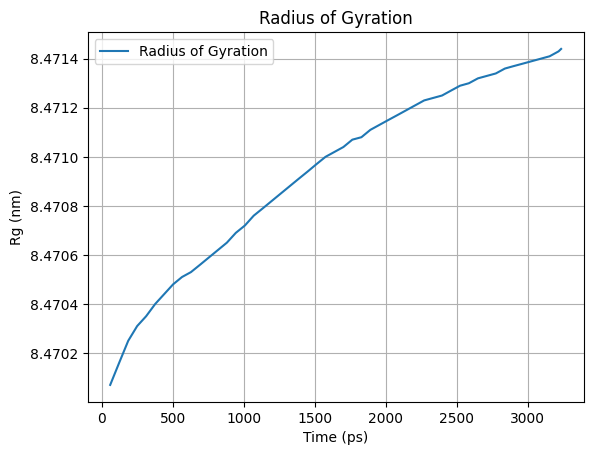

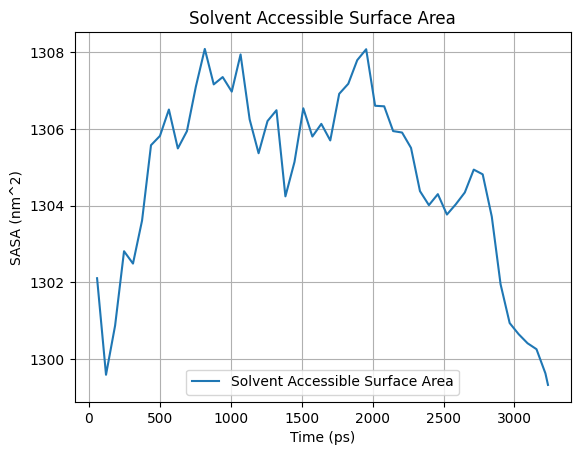

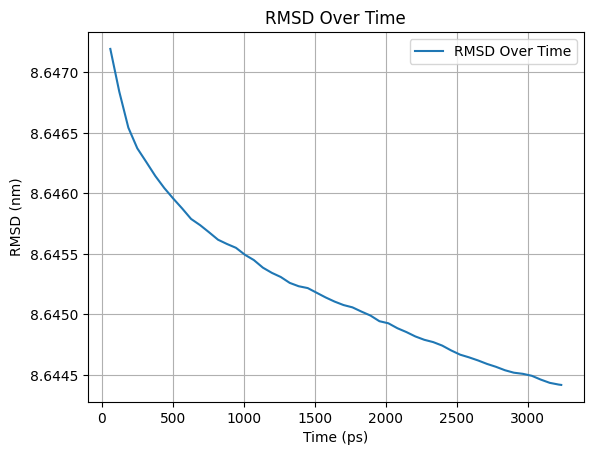

In [42]:
plot_xvg("gyrate.xvg", title="Radius of Gyration", ylabel="Rg (nm)")
plot_xvg("sasa.xvg", title="Solvent Accessible Surface Area", ylabel="SASA (nm^2)")
plot_xvg("rmsd_first.xvg", title="RMSD Over Time", ylabel="RMSD (nm)")

In [9]:
import subprocess
import atexit
from IPython.display import HTML, display

class TunnelManager:
    _instance = None  # Singleton reference

    def __new__(cls, *args, **kwargs):
        # Kill previous instance if it exists
        if cls._instance is not None:
            cls._instance.cleanup()
        cls._instance = super().__new__(cls)
        return cls._instance

    def __init__(self, tunnel_cmd, streamlit_cmd):
        self.tunnel_cmd = tunnel_cmd
        self.streamlit_cmd = streamlit_cmd
        self.process_tunnel = None
        self.process_streamlit = None
        self._started = False

        self.start()

    def start(self):
        if self._started:
            return
        self._started = True

        # Start tunnel and Streamlit
        self.process_tunnel = subprocess.Popen(['bash', '-c', self.tunnel_cmd], stdout=subprocess.PIPE)
        self.process_streamlit = subprocess.Popen(['bash', '-c', self.streamlit_cmd], stdout=subprocess.PIPE)

        # Register cleanup on exit
        atexit.register(self.cleanup)

        # Display the link
        name = self.tunnel_cmd.split('--name')[1].split()[0]
        url = f'https://{name}.flare.cloud.e-infra.cz/'
        display(HTML(f'<a href="{url}" target="_blank">Click here to visit your visualization website</a>'))

    def cleanup(self):
        if self.process_tunnel and self.process_tunnel.poll() is None:
            self.process_tunnel.terminate()
        if self.process_streamlit and self.process_streamlit.poll() is None:
            self.process_streamlit.terminate()
        TunnelManager._instance = None  # Reset singleton


In [10]:
import secrets

heslo = secrets.token_urlsafe(8)
print(f"Heslo pro vstup do aplikace: {heslo}")
with open("heslo.txt", "w") as f:
    f.write(heslo)

Heslo pro vstup do aplikace: nGO0b5Y2ArU


In [ ]:
# Usage
name = 'pokus'
tunnel_cmd = f'flare tunnel --port 8501 --name {name} --server frps.flare-ns.svc.cluster.local'
streamlit_cmd = 'streamlit run molstar.py'

tm = TunnelManager(tunnel_cmd, streamlit_cmd)

In [14]:
# For user to end the visualization site
tm.cleanup()

# Obsolete code. Replaced by code above #

In [32]:
import subprocess
from IPython.display import HTML, display
name = 'pokus'
comand = f'flare tunnel --port 8501 --name {name} --server frps.flare-ns.svc.cluster.local'

process_tunnel = subprocess.Popen(['bash', '-c', comand], stdout=subprocess.PIPE)
process_molstar = subprocess.Popen(['bash', '-c', 'streamlit run molstar1.py'], stdout=subprocess.PIPE)
url = f'https://{name}.flare.cloud.e-infra.cz/'
display(HTML(f'<a href="{url}" target="_blank">Click here to visit your visualization website</a>'))

In [39]:
process_tunnel.terminate()
process_molstar.terminate()

In [1]:
# clear the work space
import os
process_tunnel.terminate()
process_molstar.terminate()

#directory = os.fsencode("/home/jovyan")
directory = os.getcwd()

for file in os.listdir(directory):
    f = os.path.join(directory, file)
    if os.path.isfile(f) and not f.endswith(".py") and not f.endswith(".ipynb"):
        os.remove(f)
print("cleanup done")



cleanup done
